In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import pandas as pd
import collections
import json

def load_data(filename='database.db'):
    # Load data from database
    cnx = sqlite3.connect(filename)

    # Get events and agents dataframes
    events_df = pd.read_sql_query("SELECT * FROM events", cnx)
    agents_df = pd.read_sql_query("SELECT * FROM agents", cnx)
    cnx.close()

    return events_df, agents_df

# TODO: Support the evolution of network over time
def create_nx_network(filename):
    events_df, agents_df = load_data(filename)

    weights = collections.defaultdict(int)

    # Each agent interacts with some witnesses and the weights are the number of interactions between the agent and each witness
    for index, row in events_df.iterrows():
        u = row['agent_id']
        vs = json.loads(row['witness_ids'])

        # Increase weights for every interaction
        for v in vs:
            if u != v:
                weights[u, v] += 1

    print(weights)

    # Create graph
    G = nx.Graph()

    # Add nodes
    for index, row in agents_df.iterrows():
        G.add_node(row['id'], name=row['full_name'])

    # Add edges
    for (u, v), weight in weights.items():
        G.add_edge(u, v, weight=weight)

    return G

defaultdict(<class 'int'>, {('5a9cb5e0-3030-53a9-5ef5-7d5c440e66ee', '2423c977-cfdf-5c65-9814-bd8a01f638ce'): 1, ('2423c977-cfdf-5c65-9814-bd8a01f638ce', '5a9cb5e0-3030-53a9-5ef5-7d5c440e66ee'): 1, ('2423c977-cfdf-5c65-9814-bd8a01f638ce', 'c9ab2add-77ee-af39-204b-b27911c1f836'): 5, ('c9ab2add-77ee-af39-204b-b27911c1f836', '2423c977-cfdf-5c65-9814-bd8a01f638ce'): 3})


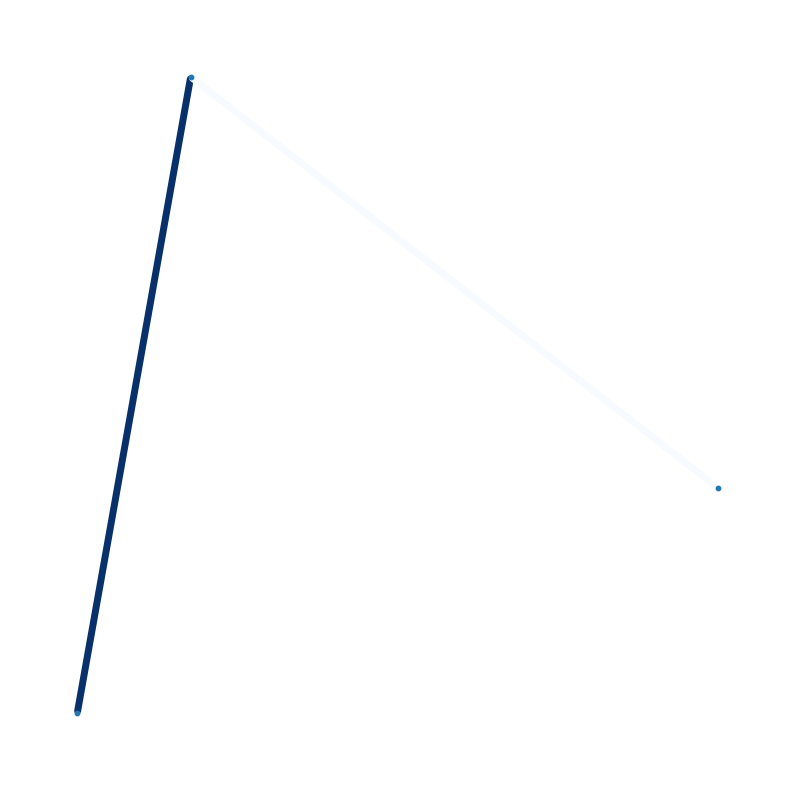

In [2]:
database_filename = '/Users/marios/workspace/GPTeam/default_database.db'

G = create_nx_network(database_filename)

fig, ax = plt.subplots(figsize=(10, 10))
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

pos = nx.spectral_layout(G)
nx.draw(G, pos, node_size=10, edgelist=edges, edge_color=weights, width=5.0, edge_cmap=plt.cm.Blues, ax=ax, arrows=True)

